### Boston Housing Dataset

The purpose of this assignment is to conduct an analysis on the boston housing dataset. The analysis will review whether there is a significant difference in median house prices along the Charles river and those that aren’t. This assigment will also predict the median house prices through generating neural networks.

#### About the dataset 
The dataset used in this assessment has been downloaded from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php. The dataset contains US census housing data related to various houses in areas around the city of Boston.This dataset contains 506 rows and 14 columns. 

The fourteen columns consist of the following data: 

|Column Name |     Column Description                                                      |
|------------|-----------------------------------------------------------------------------|
|CRIM        |Crime rates per town (CRIM)                                                  |
|ZN          |Proportion of residential land zoned for lots over 25,000 sq.ft.             |
|Indus       |Proportion of non-retail business acres per town                             |
|Chas        |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        |
|Nox         |Nitrogen oxides concentration (parts per 10 million)                         |
|Rm          |Average number of rooms per dwelling                                         |
|Age         |Proportion of owner-occupied units built prior to 1940                       |
|Dis         |Weighted mean of distances to five Boston employment centres                 |
|Rad         |Index of accessibility to radial highways                                    |
|Tax         |Full-value property-tax rate per 10,000                                       |
|Ptratio     | pupil-teacher ratio by town                                                  |
|Black       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town               |
|Lstat       | lower status of the population (percent)                                     |
|Medv        | median value of owner-occupied homes in $1000s                               |
    
    
    
    
    
    
    
    

##### Import Data 
The Boston Housing dataset was imported into a jupyter notebook. The first five lines of the data were displayed as well as  the datatypes, to ensure that the data had been imported correctly.

In [35]:
# Author Róisín Anglim 29-09-19
# Import packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
#Show data datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

##### Cleaning the Data

This step involved identifying missing,duplicate or unnecessary data in order to remove them from the analysis. 

Descriptive statistics was used on the data, to review if any columns contained a min value of zero. A minimum value of zero can indicate missing or invalid data.The only coulmns within this dataset that contained minimum values of zero were, ZN and CHAS. 
CHAS contains boolean values of 1 and 0, indicating whether the house is along the river or not.This column was eliminated from the review. ZN has been identified as having 372 cells with values equal to zero. ZN represents the amount of zoned land and will be zero for areas that have not been zoned. This coulmn was also eliminated.

The pandas package was used to identify Null values and duplicate values. No cells within the dataset were identified as having either.

Each variable within the dataset was plotted on a scatterplot inorder to identify outliers. No data was eliminated from the dataset.

In [37]:
# Show descriptive statistics to identify missing or invalid data.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
##### Identify the number of zero value cells
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [39]:
#Identify duplicate rows
#df.duplicated(subset=None, keep=True)
df[df.duplicated(keep='first')]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


AttributeError: module 'seaborn' has no attribute 'plt'

<Figure size 1200x1200 with 0 Axes>

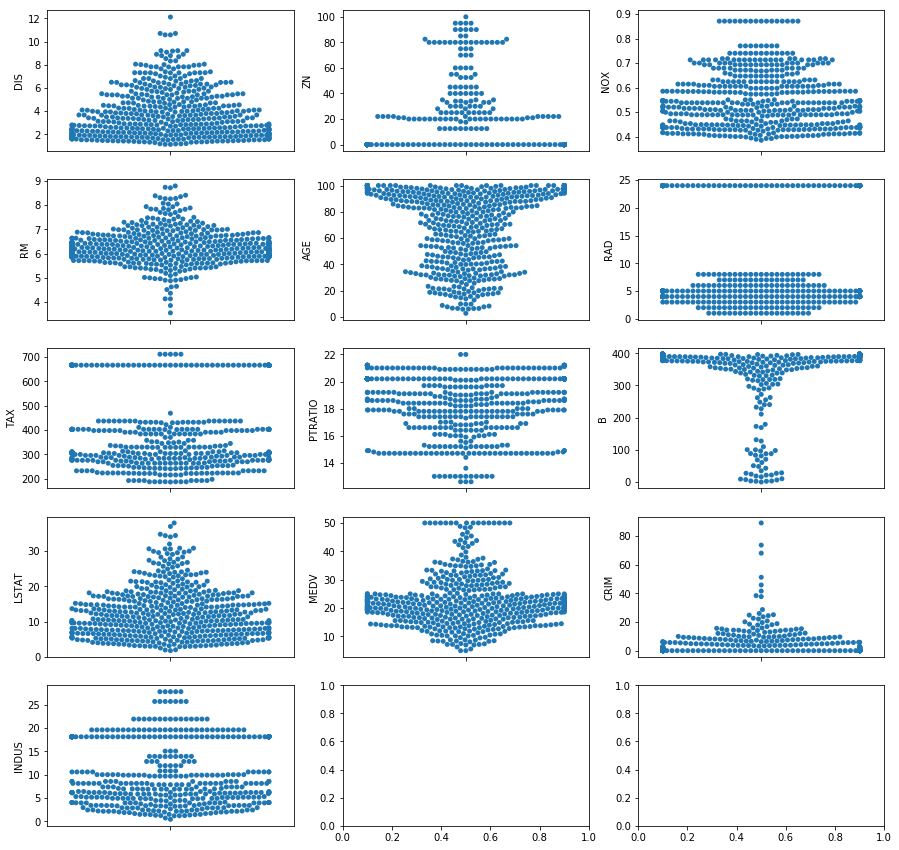

In [40]:
## Univariate Analysis
#Plot scatterplot data to identify outliers 
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=5)
sns.swarmplot(y="DIS",data=df,ax=ax[0][0])
sns.swarmplot(y="ZN",data=df, ax=ax[0][1])
sns.swarmplot(y="NOX",data=df,ax=ax[0][2])
sns.swarmplot(y="RM",data=df,ax=ax[1][0])
sns.swarmplot(y="AGE",data=df,ax=ax[1][1])
sns.swarmplot(y="RAD",data=df,ax=ax[1][2])
sns.swarmplot(y="TAX",data=df,ax=ax[2][0])
sns.swarmplot(y="PTRATIO",data=df,ax=ax[2][1])
sns.swarmplot(y="B",data=df,ax=ax[2][2])
sns.swarmplot(y="LSTAT",data=df,ax=ax[3][0])
sns.swarmplot(y="MEDV",data=df,ax=ax[3][1])
sns.swarmplot(y="CRIM",data=df,ax=ax[3][2])
sns.swarmplot(y="INDUS",data=df,ax=ax[4][0])
sns.plt.show()

### Inferential Statistics 
#### Plot median house value distribution

The data is split between houses alongside the river and houses not along the river. The median values of these properties were plotted.There is a normal distribution for the houses along the river and a bimodal distribution between those not along the river.

In [ ]:
#x = np.random.normal(size=100)
## Select the data where the houses are along the river
r= df.loc[df['CHAS'] == 1]
## Select the data where the houses are not along the river
s = df.loc[df['CHAS'] == 0]
#Plot distributions of houses along the river and not along the river
sns.distplot(r.MEDV)
sns.distplot(s.MEDV)

#### Independant T-Test
An independant t-test was conducted on the two groups median house values. The first group r consisted of the houses along the river and the secound group s consisted of the houses not along the river. 
The results indicated that with a p-value 0f 0.07 the results are not significantly different.

In [ ]:
#Independant t-test

ttest = stats.ttest_ind(r['MEDV'], s['MEDV'])
print(ttest)

### Predicting Median house prices
#### Linear regression

The median house price distribution is plotted, to see that the house prices are normally distributed. 

In [ ]:
#Plots the distribution of the median house prices
sns.distplot(df['MEDV'], bins=30)
sns.plt.show()

#### Correlation Matrix Plot

In [ ]:
###BI Variate analysis
##Create correlation matrix

plt.figure(figsize=(14,14))
#Add coolwarn colour and annotations for each correlation
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);


### Correlation Matrix Review

The correlation matrix was used to identify variables highly correlated to the median house prices.

From the correlation matrix the percentage of the population that is lower class(LSTAT) and the number of rooms per house(RM), have the highest correlation 74% and 70%. As the number of rooms (RM) increase the median house prices (MEDV) increase. In contrast to this as the lower class popoulation percentage (LSTAT) increases the median house prices decrease (MEDV).

The correlation matrix was used to check for multi-co-linearity. The variables RAD and TAX have a correlation of 91%. The variables DIS and Age have a correlation of 75%.NOX and INDUS have a correlation of 76%. Only one of each of the highly correlated variables will be selected for training the model.

In [ ]:
https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

#### Scatterplot 
The scatterplot was used to identify variables with a linear relationship to the median house prices.
It is evident from the plots that RM and LSTAT have a linear relationship. As the number of rooms (RM) increase the median value(MEDV) increases. Contrastingly as the percentage population of lower class increases, the median houses decrease.

In [ ]:
#Creates a multiple scatterplots for all variables against the target variable
fig= plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=4)
sns.regplot("DIS","MEDV",df,ax=ax[0][0],scatter_kws={'alpha': 0.4})
sns.regplot("ZN","MEDV",df, ax=ax[0][1],scatter_kws={'alpha': 0.4})
sns.regplot("NOX","MEDV",df,ax=ax[0][2],scatter_kws={'alpha': 0.4})
sns.regplot("RM","MEDV",df,ax=ax[1][0],scatter_kws={'alpha': 0.4})
sns.regplot("AGE","MEDV",df,ax=ax[1][1],scatter_kws={'alpha': 0.4})
sns.regplot("RAD","MEDV",df,ax=ax[1][2],scatter_kws={'alpha': 0.4})
sns.regplot("TAX","MEDV",df,ax=ax[2][0],scatter_kws={'alpha': 0.4})
sns.regplot("PTRATIO","MEDV",df,ax=ax[2][1],scatter_kws={'alpha': 0.4})
sns.regplot("B","MEDV",df,ax=ax[2][2],scatter_kws={'alpha': 0.4})
sns.regplot("LSTAT","MEDV",df,ax=ax[3][0],scatter_kws={'alpha': 0.4})
sns.regplot("CRIM","MEDV",df,ax=ax[3][2],scatter_kws={'alpha': 0.4})
sns.regplot("INDUS","MEDV",df,ax=ax[3][1],scatter_kws={'alpha': 0.4})
sns.plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#This contains all columns excluding highly correlated variables =75%
X = df.drop(columns =['MEDV','INDUS','RAD','AGE'])
#This includes the target variable median house prices (MEDV)
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
print(test_set_rmse)

### Removing Variables

Variables with high correlations grether than 70% were reviewed and only one was retained to utilize in the prediction model.



#### Data Exploation and Analysis 
Based on the number high number of variables within the dataset a dimention reduction technique was used.

#### Principle Component Analysis
Principle component analysis (PCA) is a dimention reduction technique. It works by taking highly correlated variables and transforming them into linearly uncorrelated principal components. PCA comonents have no correlation with eachother.

#### PCA Scalability
In order to prevent a large value from doiminating the results, the data was scaled.PCA is affected by scalability.

In [ ]:
##### Scale data for PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)

##### Apply PCA to the dataset
PCA was applied to the dataset and based on the original number of variables, in ths case 14. PCA returned the same number of principle components.

In [ ]:
#PCA is applied to all variables within the dataset
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

### Split test and Train Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### PCA Ratio
The PCA ratio was used to show the principle components which repreent the most variance in the data.
From the results you can see that PCA one and two combined account for 57% of the variance in the data. 

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Boston Housing Dataset Explained Variance')
plt.show()

#### Plot the new PCA components againts the medium house prices

In [ ]:
# x_pca['CHAS']= y
# x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','CHAS']
# x_pca.head()
print(x_pca)

#### Scatterplot PCA0 & PCA1

A scatterplot was generated to investiagte if there was a strong correlation between the first and second PCA's, which account for 57% of the variance in the data. 
Based on the output below there is not a strong linear reltionship indicating that there is no relationship between the two variables.

In [ ]:
# use the function regplot to make a scatterplot
sns.regplot(x=x_pca[0], y=x_pca[1])
sns.plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['MEDV']
colors = ['r']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

### Using Keras to Predict House Prices

The Keras package was used to create neural networks inorder to predict the median house prices. The data and required pakages were imported.

All of the thirteen variables within the dataset were used to conduct the first prediction.

The data was split between between test and training data 20% and 80% respectively. 

#### Import parkages to create neural network

In [44]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test datasets.
import sklearn.model_selection as mod

Using TensorFlow backend.


### Inputs for neural network

In [46]:
#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
#This contains all columns excluding the median house prices (MEDV)
inputs = df.drop(columns =['MEDV'])
#This only includes the column median house prices (MEDV)
outputs = df[['MEDV']]

### Split dataset into test & train data

In [49]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

## Build Model

In [50]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with x neurons and an input layer with 4.
model.add(kr.layers.Dense(units=13, activation='relu', input_dim=13))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='relu'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [51]:
## Summary of the sequential model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [52]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

In [53]:
inputs_test.iloc[0,:]

CRIM         9.92485
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.74000
RM           6.25100
AGE         96.60000
DIS          2.19800
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          388.52000
LSTAT       16.44000
Name: 447, dtype: float64

In [54]:
model.predict(inputs_test.as_matrix()[0:1])

C:\Users\Harvey Norman\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-0.]], dtype=float32)

In [55]:
model.fit(inputs_train, outputs_train, epochs=1000, batch_size=50)

Epoch 1/1000
404/404 [==============================] - 0s 838us/step - loss: 1124.5036 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 35us/step - loss: 875.7700 - accuracy: 0.0000e+00
Epoch 3/1000
404/404 [==============================] - 0s 29us/step - loss: 718.1321 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 49us/step - loss: 637.9153 - accuracy: 0.0000e+00
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 603.1479 - accuracy: 0.0000e+00
Epoch 6/1000
404/404 [==============================] - 0s 32us/step - loss: 587.6525 - accuracy: 0.0000e+00
Epoch 7/1000
404/404 [==============================] - 0s 54us/step - loss: 583.7107 - accuracy: 0.0025
Epoch 8/1000
404/404 [==============================] - 0s 32us/step - loss: 581.5572 - accuracy: 0.0000e+00
Epoch 9/1000
404/404 [==============================] - 0s 34us/step - loss: 581.2844 - accuracy: 0.0000e+00
Epoch 10/1000
404/404

404/404 [==============================] - 0s 42us/step - loss: 580.6656 - accuracy: 0.0025
Epoch 77/1000
404/404 [==============================] - 0s 44us/step - loss: 580.6394 - accuracy: 0.0025
Epoch 78/1000
404/404 [==============================] - 0s 39us/step - loss: 580.9069 - accuracy: 0.0000e+00
Epoch 79/1000
404/404 [==============================] - 0s 42us/step - loss: 580.7906 - accuracy: 0.0000e+00
Epoch 80/1000
404/404 [==============================] - 0s 40us/step - loss: 580.7532 - accuracy: 0.0000e+00
Epoch 81/1000
404/404 [==============================] - 0s 45us/step - loss: 580.7642 - accuracy: 0.0000e+00
Epoch 82/1000
404/404 [==============================] - 0s 48us/step - loss: 580.7277 - accuracy: 0.0000e+00
Epoch 83/1000
404/404 [==============================] - 0s 44us/step - loss: 580.7721 - accuracy: 0.0000e+00
Epoch 84/1000
404/404 [==============================] - 0s 44us/step - loss: 580.5768 - accuracy: 0.0025
Epoch 85/1000
404/404 [=============

404/404 [==============================] - 0s 37us/step - loss: 579.4393 - accuracy: 0.0000e+00
Epoch 151/1000
404/404 [==============================] - 0s 42us/step - loss: 579.4261 - accuracy: 0.0000e+00
Epoch 152/1000
404/404 [==============================] - 0s 37us/step - loss: 579.4113 - accuracy: 0.0000e+00
Epoch 153/1000
404/404 [==============================] - 0s 45us/step - loss: 579.3548 - accuracy: 0.0000e+00
Epoch 154/1000
404/404 [==============================] - 0s 55us/step - loss: 579.3509 - accuracy: 0.0000e+00
Epoch 155/1000
404/404 [==============================] - 0s 39us/step - loss: 579.3108 - accuracy: 0.0000e+00
Epoch 156/1000
404/404 [==============================] - 0s 42us/step - loss: 579.2862 - accuracy: 0.0000e+00
Epoch 157/1000
404/404 [==============================] - 0s 59us/step - loss: 579.3835 - accuracy: 0.0025
Epoch 158/1000
404/404 [==============================] - 0s 40us/step - loss: 579.1813 - accuracy: 0.0000e+00
Epoch 159/1000
404/4

Epoch 225/1000
404/404 [==============================] - 0s 39us/step - loss: 53.7130 - accuracy: 0.0124
Epoch 226/1000
404/404 [==============================] - 0s 56us/step - loss: 53.6917 - accuracy: 0.0149
Epoch 227/1000
404/404 [==============================] - 0s 48us/step - loss: 56.8416 - accuracy: 0.0025
Epoch 228/1000
404/404 [==============================] - 0s 49us/step - loss: 55.5400 - accuracy: 0.0149
Epoch 229/1000
404/404 [==============================] - 0s 54us/step - loss: 53.1529 - accuracy: 0.0050
Epoch 230/1000
404/404 [==============================] - 0s 53us/step - loss: 53.8275 - accuracy: 0.0223
Epoch 231/1000
404/404 [==============================] - 0s 48us/step - loss: 52.9338 - accuracy: 0.0173
Epoch 232/1000
404/404 [==============================] - 0s 49us/step - loss: 52.4152 - accuracy: 0.0074
Epoch 233/1000
404/404 [==============================] - 0s 36us/step - loss: 52.8048 - accuracy: 0.0198
Epoch 234/1000
404/404 [======================

404/404 [==============================] - 0s 49us/step - loss: 34.6094 - accuracy: 0.0050
Epoch 303/1000
404/404 [==============================] - 0s 39us/step - loss: 35.0973 - accuracy: 0.0149
Epoch 304/1000
404/404 [==============================] - 0s 35us/step - loss: 34.3270 - accuracy: 0.0099
Epoch 305/1000
404/404 [==============================] - ETA: 0s - loss: 38.6160 - accuracy: 0.0000e+0 - 0s 41us/step - loss: 33.9178 - accuracy: 0.0149
Epoch 306/1000
404/404 [==============================] - 0s 51us/step - loss: 34.0699 - accuracy: 0.0248
Epoch 307/1000
404/404 [==============================] - 0s 55us/step - loss: 33.7072 - accuracy: 0.0099
Epoch 308/1000
404/404 [==============================] - 0s 41us/step - loss: 33.7118 - accuracy: 0.0124
Epoch 309/1000
404/404 [==============================] - 0s 46us/step - loss: 33.8995 - accuracy: 0.0198
Epoch 310/1000
404/404 [==============================] - 0s 44us/step - loss: 33.5031 - accuracy: 0.0099
Epoch 311/100

404/404 [==============================] - 0s 38us/step - loss: 31.1961 - accuracy: 0.0124
Epoch 379/1000
404/404 [==============================] - 0s 40us/step - loss: 31.0334 - accuracy: 0.0124
Epoch 380/1000
404/404 [==============================] - 0s 50us/step - loss: 31.0300 - accuracy: 0.0173
Epoch 381/1000
404/404 [==============================] - 0s 47us/step - loss: 31.3416 - accuracy: 0.0124
Epoch 382/1000
404/404 [==============================] - 0s 44us/step - loss: 31.5705 - accuracy: 0.0149
Epoch 383/1000
404/404 [==============================] - 0s 41us/step - loss: 30.8844 - accuracy: 0.0198
Epoch 384/1000
404/404 [==============================] - 0s 47us/step - loss: 30.7592 - accuracy: 0.0149
Epoch 385/1000
404/404 [==============================] - 0s 49us/step - loss: 30.8764 - accuracy: 0.0099
Epoch 386/1000
404/404 [==============================] - 0s 38us/step - loss: 31.0020 - accuracy: 0.0198
Epoch 387/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 46us/step - loss: 29.5172 - accuracy: 0.0149
Epoch 456/1000
404/404 [==============================] - 0s 44us/step - loss: 30.9354 - accuracy: 0.0074
Epoch 457/1000
404/404 [==============================] - 0s 47us/step - loss: 31.3603 - accuracy: 0.0149
Epoch 458/1000
404/404 [==============================] - 0s 48us/step - loss: 30.8905 - accuracy: 0.0025
Epoch 459/1000
404/404 [==============================] - 0s 47us/step - loss: 29.2851 - accuracy: 0.0173
Epoch 460/1000
404/404 [==============================] - 0s 51us/step - loss: 29.3423 - accuracy: 0.0124
Epoch 461/1000
404/404 [==============================] - 0s 52us/step - loss: 31.0424 - accuracy: 0.0050
Epoch 462/1000
404/404 [==============================] - 0s 42us/step - loss: 29.4180 - accuracy: 0.0198
Epoch 463/1000
404/404 [==============================] - 0s 47us/step - loss: 28.9014 - accuracy: 0.0099
Epoch 464/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 42us/step - loss: 28.2777 - accuracy: 0.0074
Epoch 533/1000
404/404 [==============================] - 0s 49us/step - loss: 27.8022 - accuracy: 0.0149
Epoch 534/1000
404/404 [==============================] - 0s 49us/step - loss: 27.5734 - accuracy: 0.0099
Epoch 535/1000
404/404 [==============================] - 0s 52us/step - loss: 29.1136 - accuracy: 0.0248
Epoch 536/1000
404/404 [==============================] - 0s 48us/step - loss: 27.2458 - accuracy: 0.0099
Epoch 537/1000
404/404 [==============================] - 0s 42us/step - loss: 27.3103 - accuracy: 0.0074
Epoch 538/1000
404/404 [==============================] - 0s 44us/step - loss: 28.4886 - accuracy: 0.0173
Epoch 539/1000
404/404 [==============================] - 0s 52us/step - loss: 27.9277 - accuracy: 0.0074
Epoch 540/1000
404/404 [==============================] - 0s 46us/step - loss: 27.2293 - accuracy: 0.0149
Epoch 541/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 42us/step - loss: 26.0763 - accuracy: 0.0099
Epoch 610/1000
404/404 [==============================] - 0s 47us/step - loss: 25.6736 - accuracy: 0.0124
Epoch 611/1000
404/404 [==============================] - 0s 44us/step - loss: 25.9369 - accuracy: 0.0149
Epoch 612/1000
404/404 [==============================] - 0s 54us/step - loss: 25.6266 - accuracy: 0.0124
Epoch 613/1000
404/404 [==============================] - 0s 54us/step - loss: 25.6104 - accuracy: 0.0173
Epoch 614/1000
404/404 [==============================] - 0s 42us/step - loss: 26.0753 - accuracy: 0.0124
Epoch 615/1000
404/404 [==============================] - 0s 45us/step - loss: 25.6484 - accuracy: 0.0149
Epoch 616/1000
404/404 [==============================] - 0s 50us/step - loss: 25.6550 - accuracy: 0.0173
Epoch 617/1000
404/404 [==============================] - 0s 35us/step - loss: 25.7317 - accuracy: 0.0074
Epoch 618/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 40us/step - loss: 24.8082 - accuracy: 0.0248
Epoch 687/1000
404/404 [==============================] - 0s 37us/step - loss: 24.4651 - accuracy: 0.0173
Epoch 688/1000
404/404 [==============================] - 0s 42us/step - loss: 24.7130 - accuracy: 0.0149
Epoch 689/1000
404/404 [==============================] - 0s 44us/step - loss: 24.4587 - accuracy: 0.0248
Epoch 690/1000
404/404 [==============================] - 0s 49us/step - loss: 24.0021 - accuracy: 0.0149
Epoch 691/1000
404/404 [==============================] - 0s 47us/step - loss: 24.2188 - accuracy: 0.0099
Epoch 692/1000
404/404 [==============================] - 0s 54us/step - loss: 24.3162 - accuracy: 0.0173
Epoch 693/1000
404/404 [==============================] - 0s 54us/step - loss: 24.2328 - accuracy: 0.0050
Epoch 694/1000
404/404 [==============================] - 0s 49us/step - loss: 24.5319 - accuracy: 0.0149
Epoch 695/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 44us/step - loss: 23.0835 - accuracy: 0.0149
Epoch 764/1000
404/404 [==============================] - 0s 47us/step - loss: 23.7223 - accuracy: 0.0149
Epoch 765/1000
404/404 [==============================] - 0s 48us/step - loss: 23.6186 - accuracy: 0.0173
Epoch 766/1000
404/404 [==============================] - 0s 47us/step - loss: 23.4582 - accuracy: 0.0149
Epoch 767/1000
404/404 [==============================] - 0s 44us/step - loss: 23.1057 - accuracy: 0.0198
Epoch 768/1000
404/404 [==============================] - 0s 47us/step - loss: 23.4278 - accuracy: 0.0099
Epoch 769/1000
404/404 [==============================] - 0s 45us/step - loss: 23.1242 - accuracy: 0.0173
Epoch 770/1000
404/404 [==============================] - 0s 35us/step - loss: 23.4397 - accuracy: 0.0124
Epoch 771/1000
404/404 [==============================] - 0s 49us/step - loss: 23.7807 - accuracy: 0.0149
Epoch 772/1000
404/404 [==============================] - 0s 

Epoch 840/1000
404/404 [==============================] - 0s 44us/step - loss: 24.1989 - accuracy: 0.0099
Epoch 841/1000
404/404 [==============================] - 0s 46us/step - loss: 22.7693 - accuracy: 0.0149
Epoch 842/1000
404/404 [==============================] - 0s 53us/step - loss: 23.1056 - accuracy: 0.0173
Epoch 843/1000
404/404 [==============================] - 0s 47us/step - loss: 22.8870 - accuracy: 0.0149
Epoch 844/1000
404/404 [==============================] - 0s 51us/step - loss: 22.9113 - accuracy: 0.0149
Epoch 845/1000
404/404 [==============================] - 0s 59us/step - loss: 22.3661 - accuracy: 0.0149
Epoch 846/1000
404/404 [==============================] - 0s 52us/step - loss: 23.3513 - accuracy: 0.0074
Epoch 847/1000
404/404 [==============================] - 0s 54us/step - loss: 22.9630 - accuracy: 0.0149
Epoch 848/1000
404/404 [==============================] - 0s 44us/step - loss: 22.8189 - accuracy: 0.0124
Epoch 849/1000
404/404 [======================

404/404 [==============================] - 0s 32us/step - loss: 21.7280 - accuracy: 0.0124
Epoch 918/1000
404/404 [==============================] - 0s 30us/step - loss: 22.7423 - accuracy: 0.0198
Epoch 919/1000
404/404 [==============================] - 0s 32us/step - loss: 22.9397 - accuracy: 0.0149
Epoch 920/1000
404/404 [==============================] - 0s 32us/step - loss: 22.9261 - accuracy: 0.0149
Epoch 921/1000
404/404 [==============================] - 0s 30us/step - loss: 21.8540 - accuracy: 0.0149
Epoch 922/1000
404/404 [==============================] - 0s 30us/step - loss: 21.6252 - accuracy: 0.0124
Epoch 923/1000
404/404 [==============================] - 0s 35us/step - loss: 21.6366 - accuracy: 0.0050
Epoch 924/1000
404/404 [==============================] - 0s 30us/step - loss: 21.9170 - accuracy: 0.0149
Epoch 925/1000
404/404 [==============================] - 0s 27us/step - loss: 23.3817 - accuracy: 0.0149
Epoch 926/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 32us/step - loss: 21.7792 - accuracy: 0.0074
Epoch 995/1000
404/404 [==============================] - 0s 30us/step - loss: 21.9381 - accuracy: 0.0124
Epoch 996/1000
404/404 [==============================] - 0s 32us/step - loss: 21.3296 - accuracy: 0.0149
Epoch 997/1000
404/404 [==============================] - 0s 32us/step - loss: 21.2232 - accuracy: 0.0124
Epoch 998/1000
404/404 [==============================] - 0s 33us/step - loss: 21.3823 - accuracy: 0.0124
Epoch 999/1000
404/404 [==============================] - 0s 32us/step - loss: 21.1096 - accuracy: 0.0149
Epoch 1000/1000
404/404 [==============================] - 0s 32us/step - loss: 22.4212 - accuracy: 0.0124


In [60]:
# Have the network predict the classes of the test inputs.
predictions = model.predict(inputs_test)
print(predictions)

[[18.492672 ]
 [20.647945 ]
 [16.885784 ]
 [15.3833475]
 [36.778954 ]
 [22.008778 ]
 [15.277633 ]
 [17.542902 ]
 [37.144787 ]
 [30.300594 ]
 [17.32536  ]
 [40.670383 ]
 [26.08472  ]
 [26.222176 ]
 [22.871466 ]
 [13.570556 ]
 [19.433304 ]
 [31.508856 ]
 [30.261255 ]
 [25.850733 ]
 [39.486008 ]
 [35.9358   ]
 [17.585411 ]
 [17.324059 ]
 [26.4486   ]
 [27.11731  ]
 [27.392174 ]
 [23.014328 ]
 [20.188972 ]
 [15.593724 ]
 [ 9.654586 ]
 [23.84302  ]
 [19.551922 ]
 [36.831184 ]
 [27.667103 ]
 [26.656593 ]
 [16.380816 ]
 [26.412033 ]
 [20.310219 ]
 [20.812881 ]
 [27.309647 ]
 [20.415848 ]
 [23.910799 ]
 [11.786643 ]
 [30.64929  ]
 [23.438656 ]
 [22.058752 ]
 [24.5369   ]
 [33.68355  ]
 [10.83631  ]
 [23.811605 ]
 [34.7125   ]
 [23.68018  ]
 [18.784912 ]
 [32.072624 ]
 [15.409745 ]
 [27.129196 ]
 [38.120125 ]
 [25.088776 ]
 [18.225052 ]
 [15.387565 ]
 [20.962135 ]
 [29.47961  ]
 [31.57693  ]
 [31.750618 ]
 [22.868023 ]
 [16.013746 ]
 [16.178095 ]
 [23.532244 ]
 [20.620422 ]
 [21.165306 ]
 [15.6

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(outputs_test,predictions) 

36.29858689381318

### Calculate error in model (Using mean absolute error)

In [ ]:
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

np.mean(abs(predictions - outputs_test))

##### References 

[2] Data Cleaning with Python and Pandas: Detecting Missing Values https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b (Accessed 21.11.19)

[3]Dimension Reduction Techniques with Python https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c (Accessed 21.11.19)

[4]SciKit Learn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA (Accessed 21.11.19)

[5] A complete guide to scatterplots https://chartio.com/learn/charts/what-is-a-scatter-plot/ (Accessed 24.11.19)

[6] Linear Regression on Boston Housing Dataset https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 (Accessed 03.12.19)

[7] Example of Multiple Linear Regression in Python https://datatofish.com/multiple-linear-regression-python/ (Accessed 04.12.19)

[8] Implementing PCA in Python with Scikit-Learn https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/ (Accessed 4.12.19)